Wall time: 0 ns
145
107


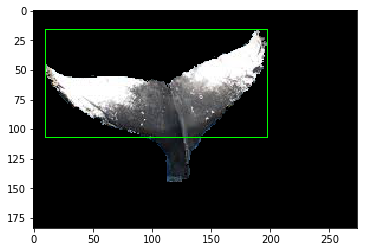

(<matplotlib.image.AxesImage at 0x1b78b303b00>, None)

In [1]:
% time

import cv2
import numpy as np
from matplotlib import pyplot as plt

out = cv2.imread('whale/grabcut_output.png')
gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)

def get_y(max_cnt, y, h):

    max_y = y + h -1
    
    # 元の画像の一番下の x を取得
    #tmp_y = max_cnt.max(axis=0)[0][1]
    tmp = max_cnt[np.where(max_cnt[:, :, 1] == max_y) ]
    target_x = tmp.max(axis= 0)[0]

    # 一番下の幅（x）と近似している輪郭のみ抽出
    cnt = max_cnt[np.where( max_cnt[:, :, 0] > target_x * 0.9 )] # 小さすぎる x座標カット
    cnt = cnt[np.where( cnt[:, 0] < target_x * 1.5 )] # 大きすぎる x座標カット
    cnt = cnt[np.where( cnt[:, 1] > h * 0.7 + y)] # 上半分を y座標カット

    return cnt.min(axis=0)[1] # 高さのみ変更 実際には y + h の座標が取得される

# binarize image
retval, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

#  Find Contours
imgEdge,contours,hierarchy = cv2.findContours(bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# 一番大きい輪郭を抽出
contours.sort(key=cv2.contourArea, reverse=True)
max_cnt = contours[0]
x, y, w, h = cv2.boundingRect(max_cnt) 

print(h + y)

h = get_y(max_cnt, y, h) # 高さのみ変更 実際には y + h の座標が取得される

print(h)

bounding_img = np.copy(out)

# 外接矩形を描画
cv2.rectangle(bounding_img, (x, y), (x + w, h), (0, 255, 0), 1)

plt.imshow(cv2.cvtColor(bounding_img, cv2.COLOR_BGR2RGB)), plt.show()